<a href="https://colab.research.google.com/github/PrathameshJamanik/hand-written-digit-prediction2/blob/main/HandWrittenDigitPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1513 - accuracy: 0.9537 - val_loss: 0.0449 - val_accuracy: 0.9860
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0326 - val_accuracy: 0.9887
Epoch 3/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0295 - accuracy: 0.9911
Test accuracy: 0.991100013256073
313/313 [==============================] - 3s 8ms/step


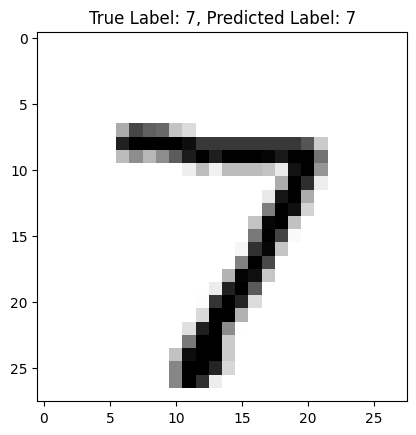

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add a color channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images)

# Display the first test image, true label, and predicted label
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"True Label: {test_labels[0]}, Predicted Label: {np.argmax(predictions[0])}")
plt.show()


# New Section